## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = merge_data_df['Mouse ID'].value_counts().count()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dups = merge_data_df[merge_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]
mice_dups[['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = merge_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df['Mouse ID'].value_counts().count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Groups clean_mice_df by drug regimen
drug_groups = clean_mice_df.groupby(['Drug Regimen'])

#Calculates mean per regimen
regimen_mean = drug_groups['Tumor Volume (mm3)'].mean()
regimen_mean = pd.DataFrame(regimen_mean)

#Calculates median per regimen
regimen_median = drug_groups['Tumor Volume (mm3)'].median()
regimen_median = pd.DataFrame(regimen_median)

#Calculates variance per regimen
regimen_variance = drug_groups['Tumor Volume (mm3)'].var()
regimen_variance = pd.DataFrame(regimen_variance)

#Calculates standard deviation per regimen
regimen_std = drug_groups['Tumor Volume (mm3)'].std()
regimen_std = pd.DataFrame(regimen_std)

#Calculates standard error of mean per regimen
regimen_sem = drug_groups['Tumor Volume (mm3)'].sem()
regimen_sem = pd.DataFrame(regimen_sem)
regimen_sem

#Creates list of all df for merging
df_list = [regimen_mean, regimen_median, regimen_variance, regimen_std, regimen_sem]

#Merges all summary df and renames columns
summary_stats_df = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'], how='outer'), df_list)
summary_stats_df.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

#Displays summary df
summary_stats_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<IPython.core.display.Javascript object>


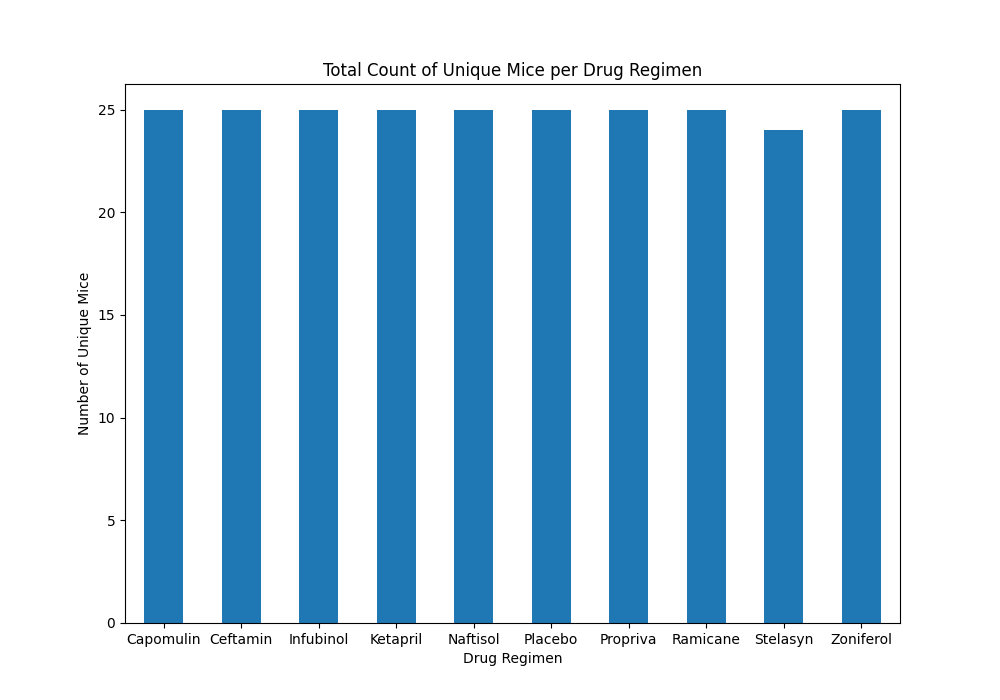

Text(0, 0.5, 'Number of Unique Mice')

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Calculates number of unique mouse id's per drug regimen
unique_mice_regimen = drug_groups['Mouse ID'].nunique()

#Creates bar plot
unique_mice_regimen_bar = unique_mice_regimen.plot.bar(figsize=(10,7), rot=0, title='Total Count of Unique Mice per Drug Regimen')
unique_mice_regimen_bar.set_ylabel('Number of Unique Mice')



<IPython.core.display.Javascript object>


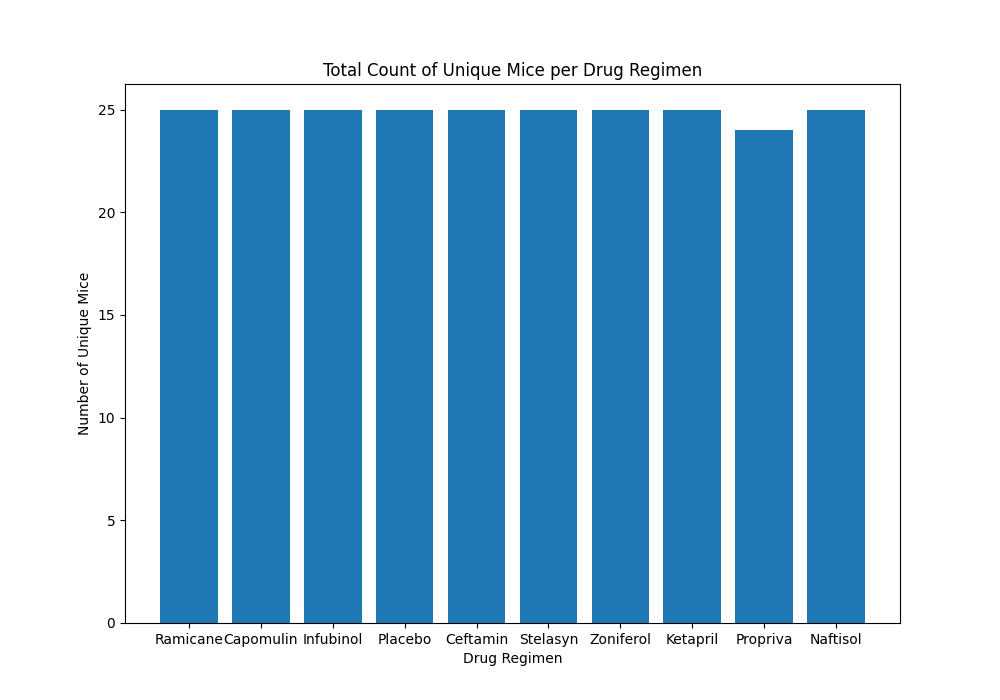

Text(0, 0.5, 'Number of Unique Mice')

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Sets x-axis and tick locations
x_axis = np.arange(len(clean_mice_df['Drug Regimen'].unique()))
tick_locations = [value for value in x_axis]

#Creates x-axis labels
drug_list = clean_mice_df['Drug Regimen'].unique()

#Creates bar plot
plt.figure(figsize=(10,7))
plt.bar(x_axis, unique_mice_regimen)
plt.xticks(tick_locations, drug_list, rotation="horizontal")

#Sets names for title and axis'
plt.title('Total Count of Unique Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice')


<IPython.core.display.Javascript object>


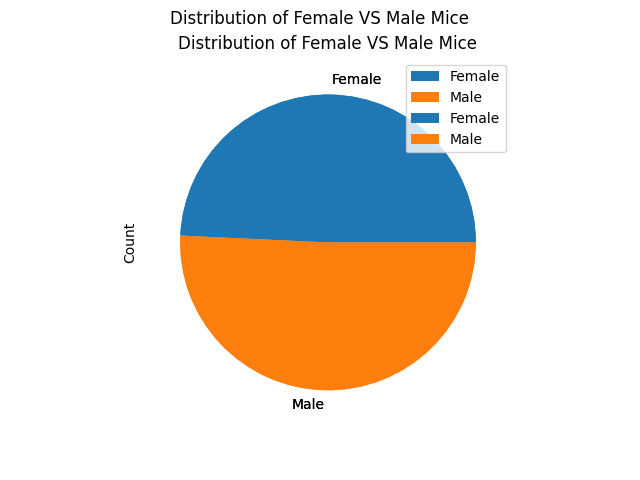

array([<AxesSubplot:ylabel='Count'>], dtype=object)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Creates df with Mouse ID and Sex columns
mice_gender = clean_mice_df[['Mouse ID', 'Sex']]

#Groups df by sex and counts total for each gender
mice_gender_count = mice_gender.groupby('Sex').count()
mice_gender_count.columns = ['Count']

#Creates pie chart
mice_gender_count.plot.pie(subplots=True, title='Distribution of Female VS Male Mice')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# %matplotlib notebook

#Create list to hold gender labels
gender_list = ['Female', 'Male']

#Creates pie chart
plt.pie(mice_gender_count['Count'], labels=gender_list)
plt.title('Distribution of Female VS Male Mice')
plt.legend(loc="upper right")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#Groups clean_mice_df by drug regimen and mouse id then calculates max value per column
last_timepoint = clean_mice_df.groupby(['Drug Regimen','Mouse ID'], as_index=False).max()

#Creates new df with max timepoint column per mouse id and drug regimen
last_timepoint = last_timepoint[['Mouse ID', 'Drug Regimen', 'Timepoint']]

#Displays only the specific drug regimens needed
last_timepoint = last_timepoint[last_timepoint['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_tumor_vol_df = pd.merge(last_timepoint, clean_mice_df, how='left', on=['Mouse ID', 'Drug Regimen', 'Timepoint'])
max_tumor_vol_df = max_tumor_vol_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

max_tumor_vol_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,b128,Capomulin,45,38.982878
1,b742,Capomulin,45,38.939633
2,f966,Capomulin,20,30.485985
3,g288,Capomulin,45,37.074024
4,g316,Capomulin,45,40.159220
5,i557,Capomulin,45,47.685963
6,i738,Capomulin,45,37.311846
7,j119,Capomulin,45,38.125164
8,j246,Capomulin,35,38.753265
9,l509,Capomulin,45,41.483008


In [59]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

#Separates each drug regimen from max_tumor_vol_df to individual df's
capomulin_volume = max_tumor_vol_df[max_tumor_vol_df['Drug Regimen'].isin(['Capomulin'])]
ramicane_volume = max_tumor_vol_df[max_tumor_vol_df['Drug Regimen'].isin(['Ramicane'])]
infubinol_volume = max_tumor_vol_df[max_tumor_vol_df['Drug Regimen'].isin(['Infubinol'])]
ceftamin_volume = max_tumor_vol_df[max_tumor_vol_df['Drug Regimen'].isin(['Ceftamin'])]

#Calculates quartiles, bounds and IQR for Capomulin
capomulin_quartiles = capomulin_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

#Calculates quartiles, bounds and IQR for Ramicane
ramicane_quartiles = ramicane_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = capomulin_upperq - capomulin_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

#Calculates quartiles, bounds and IQR for Infubinol
infubinol_quartiles = infubinol_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

#Calculates quartiles, bounds and IQR for Ceftamin
ceftamin_quartiles = ceftamin_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

#Prints results
print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin is: {capomulin_iqr}")
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")
print('--------------------------------------------------------------')
print(f"The lower quartile of Ramicane is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {ramicane_iqr}")
print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")
print('--------------------------------------------------------------')
print(f"The lower quartile of Infubinol is: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {infubinol_iqr}")
print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")
print('--------------------------------------------------------------')
print(f"The lower quartile of Ceftamin is: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {ceftamin_iqr}")
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 7.781863460000004
Values below 19.887674359999995 could be outliers.
Values above 52.33180146000001 could be outliers.
--------------------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
--------------------------------------------------------------
The lower quartile of Ceftamin is: 48.72207785
The upp

<IPython.core.display.Javascript object>


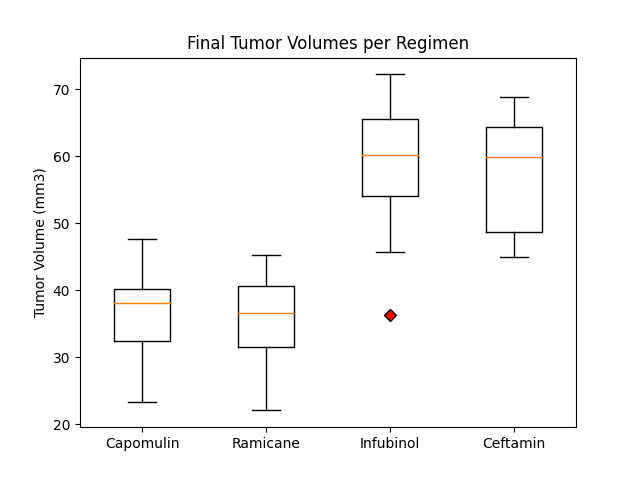

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Creates variable for outlier shape and color
red_diamond = dict(markerfacecolor='r', marker='D')

#Creates boxplot of multiple regimens in one display
data = [capomulin_volume['Tumor Volume (mm3)'], ramicane_volume['Tumor Volume (mm3)'], infubinol_volume['Tumor Volume (mm3)'], 
        ceftamin_volume['Tumor Volume (mm3)']]
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volumes per Regimen')
ax7.set_ylabel('Tumor Volume (mm3)')
ax7.boxplot(data, flierprops=red_diamond)

#Sets and labels x axis
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
box_x_axis = np.arange(len(max_tumor_vol_df['Drug Regimen'].unique())) + 1
box_tick_locations = [value for value in box_x_axis]
plt.xticks(box_tick_locations, regimen_list, rotation="horizontal")

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


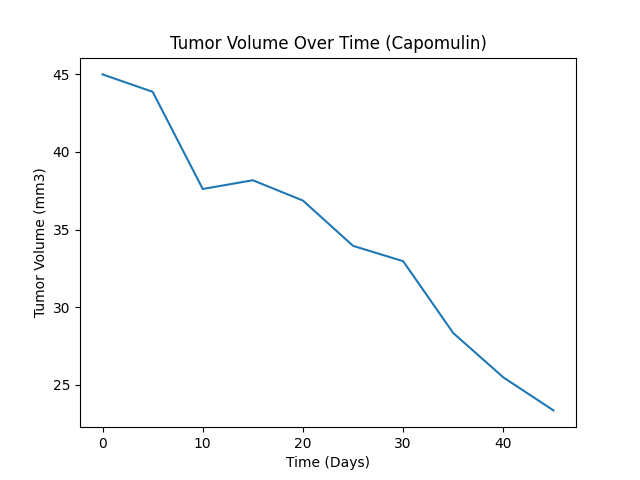

In [74]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


#Selects mouse ID s185 that was treated with Capomulin to a new df
mouse_capomulin = clean_mice_df[clean_mice_df['Mouse ID'].isin(['s185'])]

#Creates line plot of tumor volume over time
time_tumor = mouse_capomulin[['Timepoint', 'Tumor Volume (mm3)']]
plt.plot(time_tumor['Timepoint'], time_tumor['Tumor Volume (mm3)'])
plt.title('Tumor Volume Over Time (Capomulin)')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

<IPython.core.display.Javascript object>


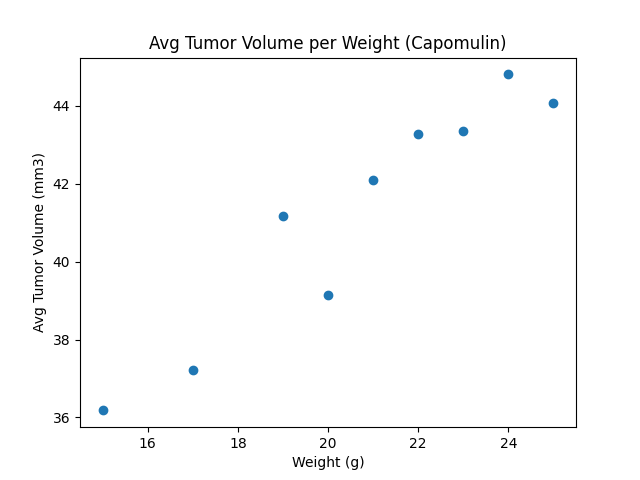

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib notebook

capomulin_df = clean_mice_df[clean_mice_df['Drug Regimen'].isin(['Capomulin'])]
volume_weight = capomulin_df[['Weight (g)', 'Tumor Volume (mm3)']]
volume_weight = volume_weight.groupby('Weight (g)', as_index=False).mean()

weight = volume_weight.iloc[:,0]
plt.scatter(volume_weight['Weight (g)'], volume_weight['Tumor Volume (mm3)'])
plt.title('Avg Tumor Volume per Weight (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

volume_weight

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
